In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import disjoint_domain as dd

_, ctx_names = dd.get_contexts()
pca = PCA(n_components=2)

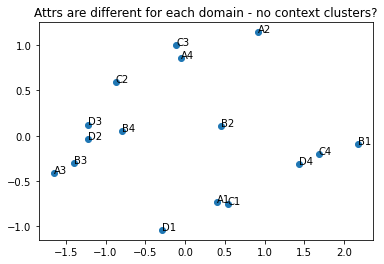

In [7]:
with np.load('data/original_new_dd_res_2021-01-12_20-21-39.npz', allow_pickle=True) as resfile:
    resfile_snaps = resfile['snapshots'].item()

ctx_repr_2D = pca.fit_transform(resfile_snaps['context'][0, -1])

fig, ax = plt.subplots()
ax.scatter(*ctx_repr_2D.T)
for c in range(16):
    ax.annotate(ctx_names[c], ctx_repr_2D[c])
ax.set_title('Attrs are different for each domain - no context clusters?')
plt.show()

Text(0.5, 1.0, 'Figure R6 - contexts clusters w/ repeated attrs across contexts')

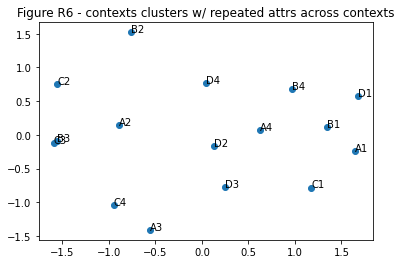

In [5]:
# Repeated attrs version - each domain is the same modulo outputting on its own units
with np.load('data/repeated_attrs_dd_res_2021-07-03_22-50-03.npz', allow_pickle=True) as resfile_rep_attrs:
    resfile_rep_attrs_snaps = resfile_rep_attrs['snapshots'].item()

ctx_repr_2D_rep_attrs = pca.fit_transform(resfile_rep_attrs_snaps['context'][0, -1])

fig, ax = plt.subplots()
ax.scatter(*ctx_repr_2D_rep_attrs.T)
for c in range(16):
    ax.annotate(ctx_names[c], ctx_repr_2D_rep_attrs[c])
ax.set_title('Figure R6 - contexts cluster w/ repeated attrs across contexts')
plt.show()